### EDA (Expolatory Data Analysis)
Author: Ejaz ur Rehman\
Date: 19-03-2025\
Email ID: ijazfinance@gmail.com

In [4]:
# Import Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [5]:
# Data Import
df = sns.load_dataset("titanic")

In [6]:
# whole snapshot of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [9]:
# find unique values in all columns
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}\n")


Unique values in survived: [0 1]

Unique values in pclass: [3 1 2]

Unique values in sex: ['male' 'female']

Unique values in age: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

Unique values in sibsp: [1 0 3 4 2 5 8]

Unique values in parch: [0 1 2 5 3 4 6]

Unique values in fare: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  2

In [10]:
# count unique values
print(df.nunique())  


survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64


In [11]:
# basic stats
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


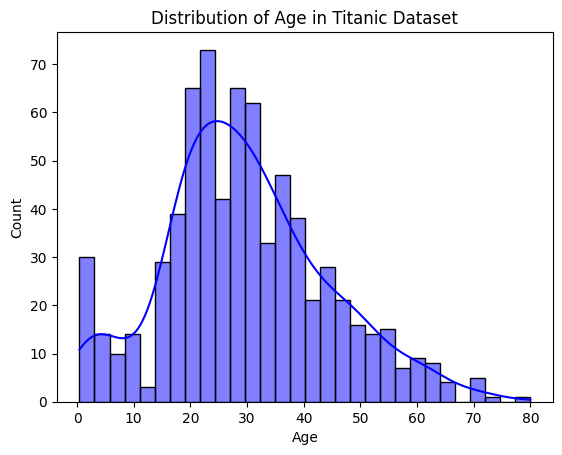

In [12]:
# prepare hist plot for age
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Plot histogram for age
sns.histplot(df['age'], bins=30, kde=True, color='blue')

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age in Titanic Dataset")

# Show plot
plt.show()



In [13]:
# apply shapiro wilk test to check the normality
import seaborn as sns
import scipy.stats as stats

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Drop missing values in 'age' column
age_data = df['age'].dropna()

# Apply Shapiro-Wilk test
shapiro_test = stats.shapiro(age_data)

# Print the test result
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")


Shapiro-Wilk Test Statistic: 0.9815, p-value: 0.0000


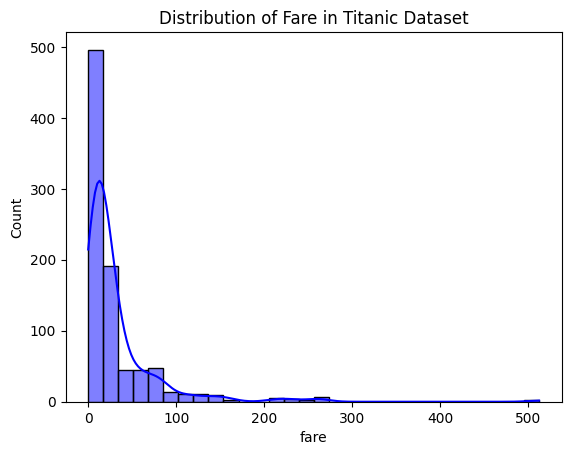

In [14]:
# prepare hist plot for fare
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Plot histogram for age
sns.histplot(df['fare'], bins=30, kde=True, color='blue')

# Add labels and title
plt.xlabel("fare")
plt.ylabel("Count")
plt.title("Distribution of Fare in Titanic Dataset")

# Show plot
plt.show()


In [18]:
# apply shapiro wilk test to check the normality

# Drop missing values in 'fare' column
fare_data = df['fare'].dropna()

# Apply Shapiro-Wilk test
shapiro_test = stats.shapiro(fare_data)

# Print the test result
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")


Shapiro-Wilk Test Statistic: 0.5219, p-value: 0.0000


C:\Users\DELL\AppData\Local\Temp\ipykernel_16472\3303211684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=df, palette="coolwarm", order=['First', 'Second', 'Third'])


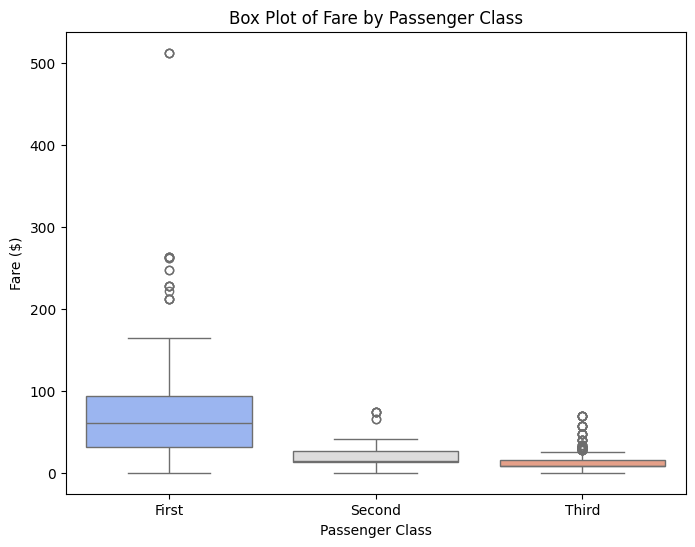

In [16]:
# Map numerical classes to labels
df['pclass'] = df['pclass'].replace({1: 'First', 2: 'Second', 3: 'Third'})

# Create a boxplot for fare based on passenger class
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='fare', data=df, palette="coolwarm", order=['First', 'Second', 'Third'])

# Add labels and title
plt.xlabel("Passenger Class")
plt.ylabel("Fare ($)")
plt.title("Box Plot of Fare by Passenger Class")

# Show plot
plt.show()


In [17]:
# Extract only First-Class passengers
first_class_fare = df[df['pclass'] == 1]['fare']

# Display first few rows
print(first_class_fare.head())


Series([], Name: fare, dtype: float64)


In [23]:
# Find the minimum fare for first-class passengers (to identify the fare range)
min_fare_first_class = df[df["pclass"] == 1]["fare"].min()

# Filter passengers based on first-class fare range
first_class_passengers = df[df["fare"] >= min_fare_first_class]

# Display the first few rows
print(first_class_passengers.head())


Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone]
Index: []


In [29]:
stats.shapiro(first_class_passengers["fare"])


C:\Users\DELL\AppData\Local\Temp\ipykernel_16472\514802977.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats.shapiro(first_class_passengers["fare"])


ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [34]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone]
Index: []
Number of outliers: 0
Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone]
Index: []


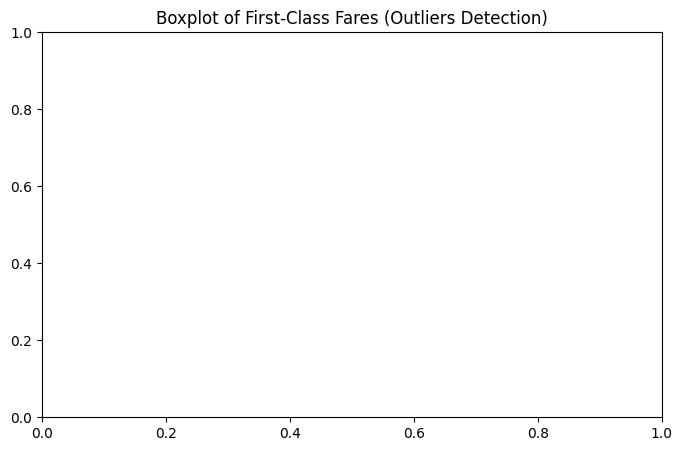

In [43]:
# Filter data for first-class passengers
first_class_passengers = df[df["pclass"] == 1]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = first_class_passengers["fare"].quantile(0.25)
Q3 = first_class_passengers["fare"].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = first_class_passengers[(first_class_passengers["fare"] < lower_bound) | 
                                  (first_class_passengers["fare"] > upper_bound)]

# print df head
print(first_class_passengers.head())
# Display the number of outliers
print("Number of outliers:", len(outliers))
print(outliers)

# Visualizing the outliers with a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=first_class_passengers["fare"])
plt.title("Boxplot of First-Class Fares (Outliers Detection)")
plt.show()


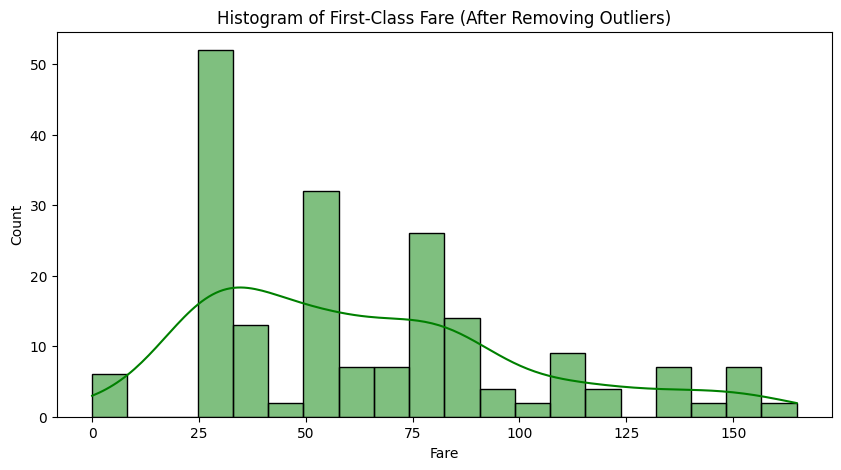

In [53]:
# Filter first-class fares
first_class_fares = df[df["pclass"] == 1]["fare"]

# Compute IQR
Q1 = first_class_fares.quantile(0.25)
Q3 = first_class_fares.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
first_class_cleaned = df[(df["pclass"] == 1) & 
                         (df["fare"] >= lower_bound) & 
                         (df["fare"] <= upper_bound)]

# Plot the histogram of cleaned first-class fares
plt.figure(figsize=(10, 5))
sns.histplot(first_class_cleaned["fare"], bins=20, kde=True, color="green")
plt.title("Histogram of First-Class Fare (After Removing Outliers)")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


In [47]:
print(f"Total first-class fares before removing outliers: {len(first_class_fares)}")
print(f"Total first-class fares after removing outliers: {len(first_class_cleaned)}")


Total first-class fares before removing outliers: 0
Total first-class fares after removing outliers: 0


In [48]:
print(df.columns)
print(df["pclass"].unique())


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
['Third' 'First' 'Second']


In [49]:
first_class_fares = df[df["pclass"] == 1]["fare"]
print(f"Total First-Class Passengers: {len(first_class_fares)}")


Total First-Class Passengers: 0


In [50]:
df["pclass"] = df["pclass"].map({"First": 1, "Second": 2, "Third": 3})


In [51]:
first_class_fares = df[df["pclass"] == 1]["fare"]
print(first_class_fares.head())


1     71.2833
3     53.1000
6     51.8625
11    26.5500
23    35.5000
Name: fare, dtype: float64


In [52]:
print(df["pclass"].dtype)  # Should now be int64
print(df["pclass"].unique())  # Should be [3, 1, 2]


int64
[3 1 2]


In [56]:
from scipy.stats import shapiro

# Filter first-class fares
first_class_fares = df[df["pclass"] == 1]["fare"].dropna()  # Remove NaN values

# Perform Shapiro-Wilk test
stat, p_value = shapiro(first_class_fares)

# Print results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("Fail to reject null hypothesis - Data is normally distributed.")
else:
    print("Reject null hypothesis - Data is not normally distributed.")


Shapiro-Wilk Test Statistic: 0.7184011166151456
P-Value: 7.556208132385032e-19
Reject null hypothesis - Data is not normally distributed.


Number of outliers: 0
Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone]
Index: []


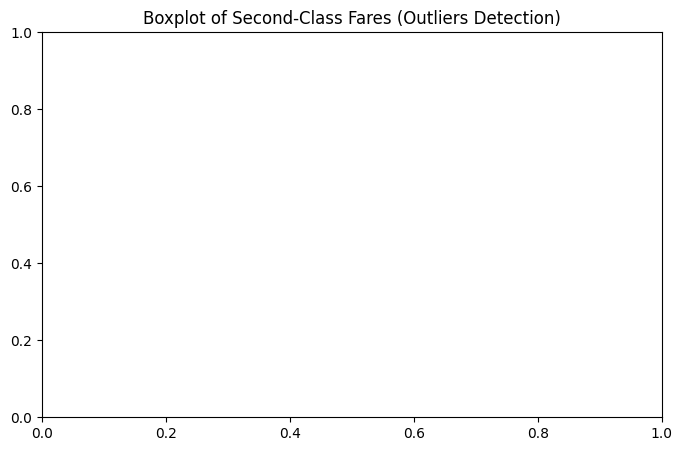

In [36]:
# Filter data for second-class passengers
second_class_passengers = df[df["pclass"] == 2]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = second_class_passengers["fare"].quantile(0.25)
Q3 = second_class_passengers["fare"].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = second_class_passengers[(second_class_passengers["fare"] < lower_bound) | 
                                   (second_class_passengers["fare"] > upper_bound)]

# Display the number of outliers
print("Number of outliers:", len(outliers))
print(outliers)

# Visualizing the outliers with a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=second_class_passengers["fare"])
plt.title("Boxplot of Second-Class Fares (Outliers Detection)")
plt.show()


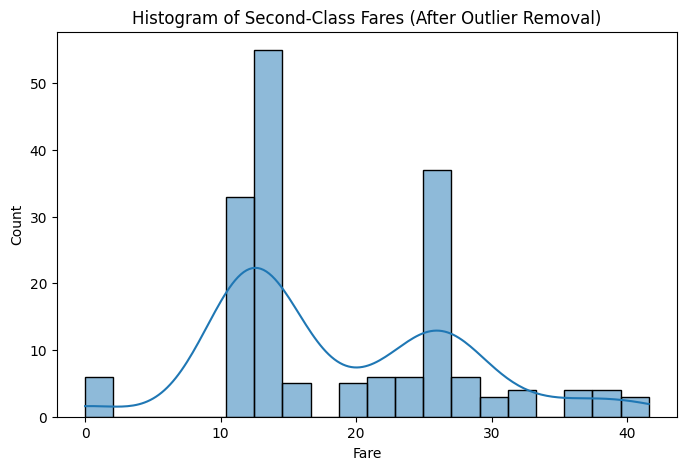

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter second-class fares
second_class_fares = df[df["pclass"] == 2]["fare"]

# Compute Q1, Q3, and IQR
Q1 = second_class_fares.quantile(0.25)
Q3 = second_class_fares.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
second_class_fares_cleaned = second_class_fares[(second_class_fares >= lower_bound) & (second_class_fares <= upper_bound)]

# Plot histogram after outlier removal
plt.figure(figsize=(8, 5))
sns.histplot(second_class_fares_cleaned, bins=20, kde=True)
plt.title("Histogram of Second-Class Fares (After Outlier Removal)")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


In [57]:
from scipy.stats import shapiro

# Filter second-class fares
second_class_fares = df[df["pclass"] == 2]["fare"].dropna()  # Remove NaN values

# Perform Shapiro-Wilk test
stat, p_value = shapiro(second_class_fares)

# Print results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("Fail to reject null hypothesis - Data is normally distributed.")
else:
    print("Reject null hypothesis - Data is not normally distributed.")


Shapiro-Wilk Test Statistic: 0.7785055068881875
P-Value: 2.113441101754537e-15
Reject null hypothesis - Data is not normally distributed.


Number of outliers: 0
Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone]
Index: []


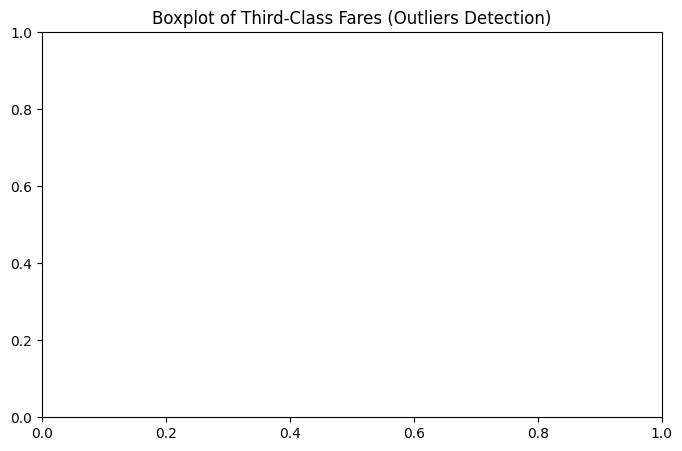

In [37]:
# Filter data for third-class passengers
third_class_passengers = df[df["pclass"] == 3]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = third_class_passengers["fare"].quantile(0.25)
Q3 = third_class_passengers["fare"].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = third_class_passengers[(third_class_passengers["fare"] < lower_bound) | 
                                  (third_class_passengers["fare"] > upper_bound)]

# Display the number of outliers
print("Number of outliers:", len(outliers))
print(outliers)

# Visualizing the outliers with a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=third_class_passengers["fare"])
plt.title("Boxplot of Third-Class Fares (Outliers Detection)")
plt.show()


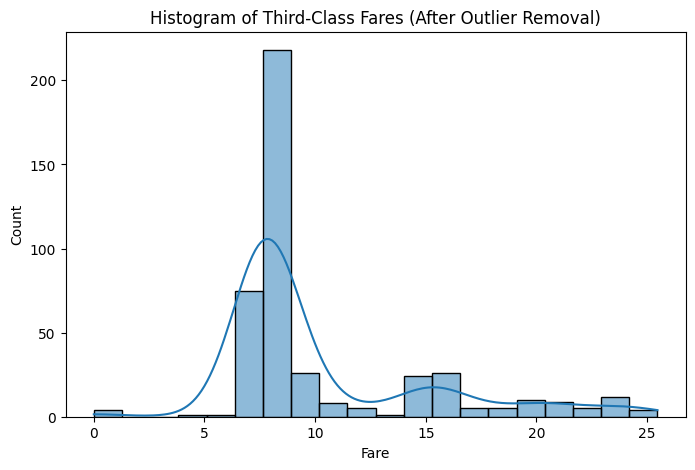

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter third-class fares
third_class_fares = df[df["pclass"] == 3]["fare"]

# Compute Q1, Q3, and IQR
Q1 = third_class_fares.quantile(0.25)
Q3 = third_class_fares.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
third_class_fares_cleaned = third_class_fares[(third_class_fares >= lower_bound) & (third_class_fares <= upper_bound)]

# Plot histogram after outlier removal
plt.figure(figsize=(8, 5))
sns.histplot(third_class_fares_cleaned, bins=20, kde=True)
plt.title("Histogram of Third-Class Fares (After Outlier Removal)")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


In [58]:
from scipy.stats import shapiro

# Filter third-class fares
third_class_fares = df[df["pclass"] == 3]["fare"].dropna()  # Remove NaN values

# Perform Shapiro-Wilk test
stat, p_value = shapiro(third_class_fares)

# Print results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("Fail to reject null hypothesis - Data is normally distributed.")
else:
    print("Reject null hypothesis - Data is not normally distributed.")


Shapiro-Wilk Test Statistic: 0.6183852077353742
P-Value: 1.5994737003198227e-31
Reject null hypothesis - Data is not normally distributed.


      fare  fare_log
0   7.2500  1.982380
1  71.2833  4.266802
2   7.9250  2.071283
3  53.1000  3.972365
4   8.0500  2.086914


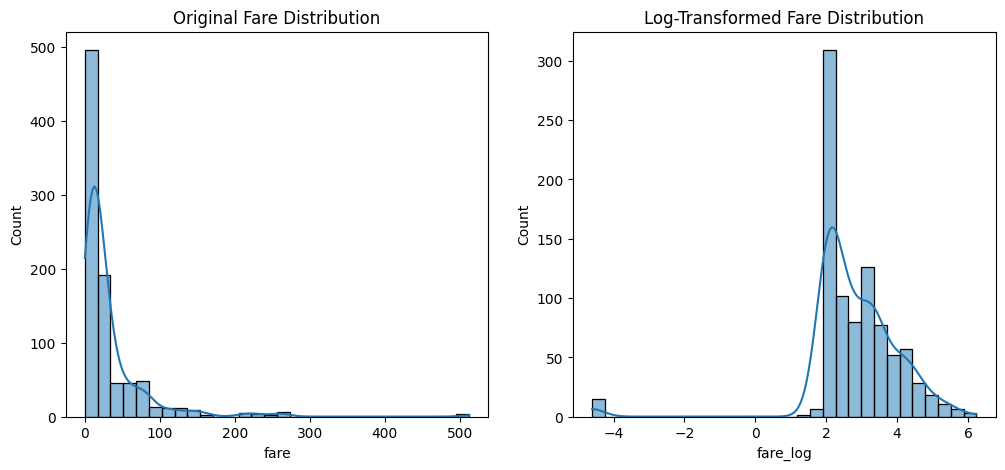

In [59]:
import numpy as np

# Avoid log(0) by replacing zero fares with a small positive value (e.g., 0.01)
df["fare_log"] = np.log(df["fare"] + 0.01)  

# Display first few rows
print(df[["fare", "fare_log"]].head())

# Plot histogram before and after log transformation
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original Fare distribution
sns.histplot(df["fare"].dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title("Original Fare Distribution")

# Log-transformed Fare distribution
sns.histplot(df["fare_log"].dropna(), bins=30, kde=True, ax=axes[1])
axes[1].set_title("Log-Transformed Fare Distribution")

plt.show()


In [60]:
from scipy.stats import shapiro

# Drop NaN values before applying Shapiro-Wilk test
fare_log_clean = df["fare_log"].dropna()

# Apply Shapiro-Wilk test
shapiro_test = shapiro(fare_log_clean)

# Print the results
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}")
print(f"P-value: {shapiro_test.pvalue}")

# Interpretation
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Fail to reject H0: The log-transformed fare data appears to be normally distributed.")
else:
    print("Reject H0: The log-transformed fare data does not follow a normal distribution.")


Shapiro-Wilk Test Statistic: 0.7397495026706413
P-value: 3.87208475609894e-35
Reject H0: The log-transformed fare data does not follow a normal distribution.


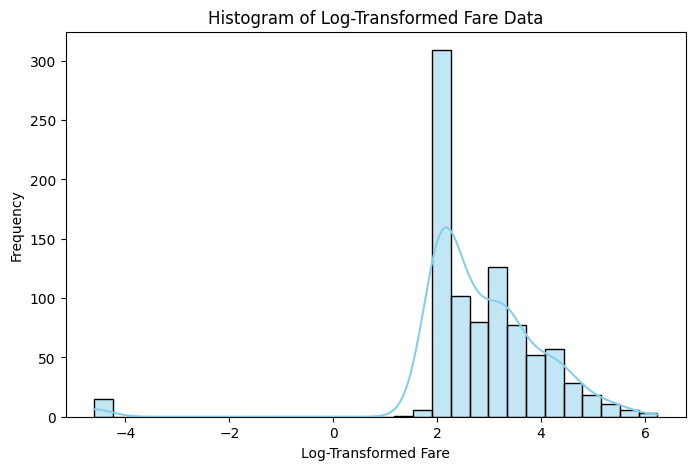

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NaN values before plotting
fare_log_clean = df["fare_log"].dropna()

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(fare_log_clean, bins=30, kde=True, color="skyblue")

# Labels and title
plt.xlabel("Log-Transformed Fare")
plt.ylabel("Frequency")
plt.title("Histogram of Log-Transformed Fare Data")

# Show the plot
plt.show()


In [62]:
import numpy as np

df["fare_sqrt"] = np.sqrt(df["fare"])


Shapiro-Wilk Test Statistic: 0.7878237120028482, p-value: 1.7474728965150849e-32


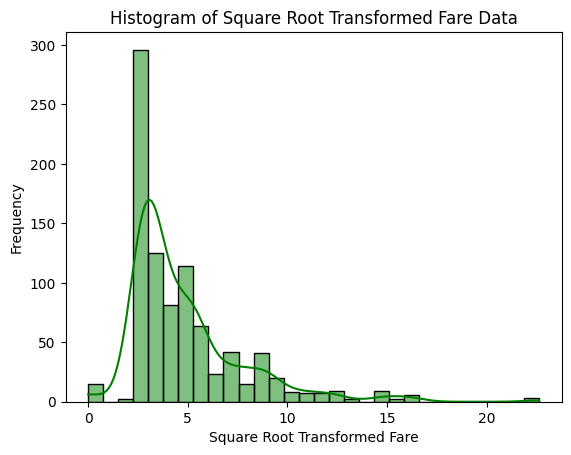

In [63]:
from scipy.stats import shapiro

stat, p = shapiro(df["fare_sqrt"].dropna())
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")

# Plot Histogram
sns.histplot(df["fare_sqrt"].dropna(), bins=30, kde=True, color="green")
plt.xlabel("Square Root Transformed Fare")
plt.ylabel("Frequency")
plt.title("Histogram of Square Root Transformed Fare Data")
plt.show()


In [64]:
from scipy.stats import boxcox

df["fare_boxcox"], lambda_val = boxcox(df["fare"] + 1)  # Adding 1 to avoid zero issues
print(f"Optimal Lambda for Box-Cox: {lambda_val}")


Optimal Lambda for Box-Cox: -0.09778702173339403


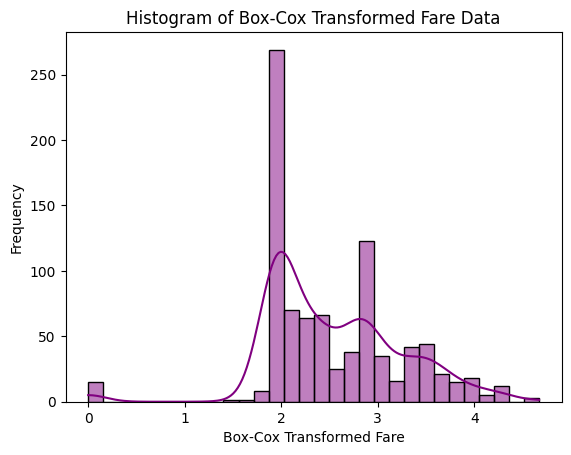

In [65]:
sns.histplot(df["fare_boxcox"], bins=30, kde=True, color="purple")
plt.xlabel("Box-Cox Transformed Fare")
plt.ylabel("Frequency")
plt.title("Histogram of Box-Cox Transformed Fare Data")
plt.show()


In [69]:
from scipy.stats import boxcox, shapiro

# Apply Box-Cox transformation (Make sure `fare` has no zero or negative values)
fare_boxcox, lambda_value = boxcox(df['fare'] + 1)  # Add 1 to handle zero values

# Perform Shapiro-Wilk Test
stat, p = shapiro(fare_boxcox)
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p}")

if p > 0.05:
    print("Fail to reject H₀: The data appears to be normally distributed.")
else:
    print("Reject H₀: The data does not follow a normal distribution.")


Shapiro-Wilk Test Statistic: 0.9120558625698859
P-value: 2.7464026278399694e-22
Reject H₀: The data does not follow a normal distribution.


In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()  # Use MinMaxScaler() for normalization
fare_scaled = scaler.fit_transform(fare_boxcox.reshape(-1, 1))


In [71]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 3.2 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.1 MB 4.3 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 4.2 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.1 MB 4.3 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 3.7 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.1 MB 3.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 3.7 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 3.6 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 3.7 MB/s eta 0:00:02
   ----------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


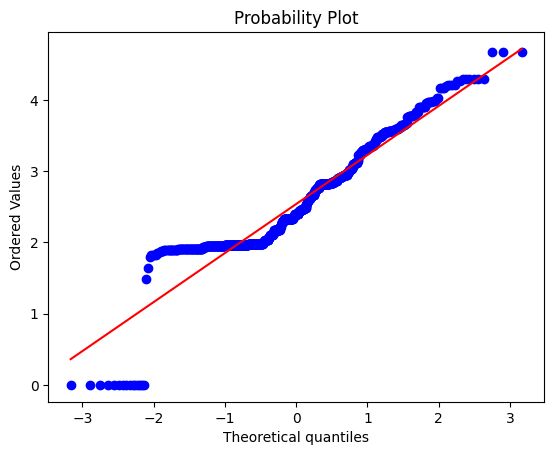

In [73]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(fare_boxcox, dist="norm", plot=plt)
plt.show()


In [74]:
from scipy.stats import shapiro

# Apply Shapiro-Wilk test on scaled data
stat, p = shapiro(fare_scaled)

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p}")

# Interpret the result
if p > 0.05:
    print("Fail to reject H₀: The data follows a normal distribution.")
else:
    print("Reject H₀: The data does not follow a normal distribution.")


Shapiro-Wilk Test Statistic: 0.9120558625698859
P-value: 2.7464026278399694e-22
Reject H₀: The data does not follow a normal distribution.


In [76]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
data_transformed = pt.fit_transform(fare.reshape(-1,1))


NameError: name 'fare' is not defined

In [79]:
print(fare)


[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.       7.8958  41.5792   7.8792   8.05    15.5      7.75
  21.6792  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5
  10.5      7.2292  27.75    46.9      7.2292  80.      83.475   27.9
  27.7208  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9
  73.5     14.4542  56.4958   7.65     7.8958   8.05    29.      12.475
   9.       9.5      7.7875  47.1     10.5     15.85    34.375    8.05
 263.       8.05     8.05     7.8542  61.175   20.575    7.25     8.05
  34.6542  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542
   7.925    7.8958   7.65     7.775    7.8958  24.15    52.      14.4542
  

In [78]:
import pandas as pd

# Example: If fare is a column in a DataFrame
fare = df['fare'].values  # Convert to NumPy array if it's a Pandas Series


In [80]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Ensure 'fare' is a NumPy array and reshaped correctly
fare = np.array(fare).reshape(-1, 1)  

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
data_transformed = pt.fit_transform(fare)

# Check the transformed data
print(data_transformed[:5])  # Print first 5 transformed values


[[-0.87882001]
 [ 1.33665056]
 [-0.79006485]
 [ 1.06735243]
 [-0.77443897]]


In [81]:
from scipy.stats import shapiro

stat, p = shapiro(data_transformed)
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p}")

if p > 0.05:
    print("Fail to reject H₀: The data is normally distributed.")
else:
    print("Reject H₀: The data does not follow a normal distribution.")


Shapiro-Wilk Test Statistic: 0.9120558618683137
P-value: 2.74640210187116e-22
Reject H₀: The data does not follow a normal distribution.


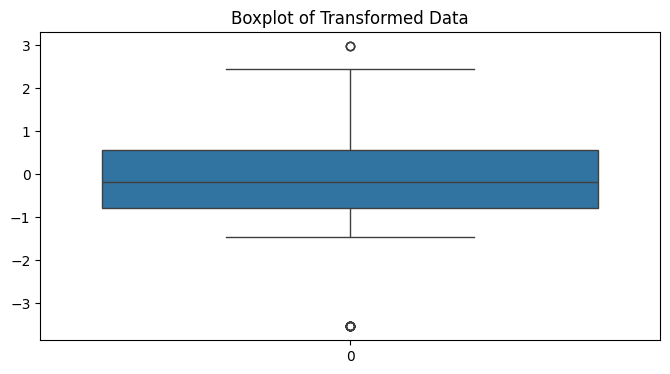

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(data_transformed)
plt.title("Boxplot of Transformed Data")
plt.show()


In [83]:
from scipy.stats.mstats import winsorize

# Apply winsorization (limits extreme values at 5% on both ends)
fare_winsorized = winsorize(fare, limits=[0.05, 0.05])

# Check normality again
stat, p = shapiro(fare_winsorized)
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p}")


Shapiro-Wilk Test Statistic: 0.7122934105252758
P-value: 1.755090740403596e-36


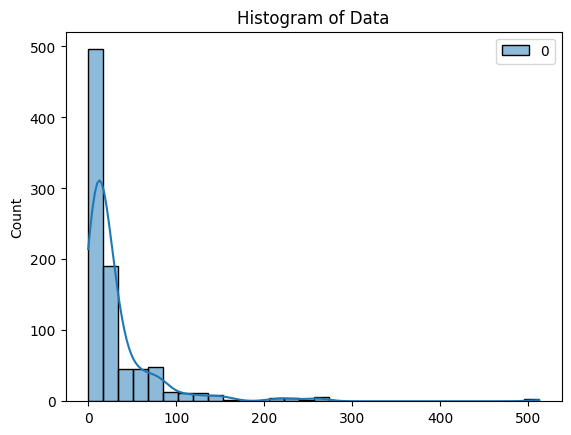

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 891 and the array at index 1 has size 1

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram
sns.histplot(fare, kde=True, bins=30)
plt.title("Histogram of Data")
plt.show()

# Q-Q Plot
stats.probplot(fare, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


In [85]:
import numpy as np

fare_log = np.log1p(fare)  # log(1 + x) to handle zero values


In [87]:
from scipy.stats import shapiro

stat, p = shapiro(fare_log)
print(f'Shapiro-Wilk Test Statistic: {stat:.4f}, P-value: {p:.4e}')

if p > 0.05:
    print("Data appears to be normally distributed (Fail to reject H0).")
else:
    print("Data is still not normally distributed (Reject H0).")


Shapiro-Wilk Test Statistic: 0.9152, P-value: 6.6419e-22
Data is still not normally distributed (Reject H0).
